<center><h1>Assignment 3</h1></center>

<h6>Q1.Use the location coordinates to find the distance for each trip. Create a new column – ‘distance’ and store its value there. Use the following formula: <br></h6>

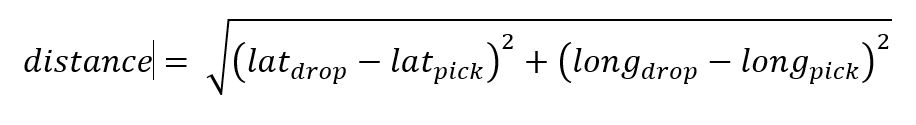

In [1]:
#Answer
import math
import pandas as pd
import matplotlib.pyplot as plt

def distanceFinder(x1, y1, x2, y2):
    return (math.sqrt((x1-x2)**2 + (y1-y2)**2))


df = pd.read_csv('Dataset_Day3.csv') #creating data frame from the csv

distances = []                       # empty list whcih will hold the distances

for index,row in df.iterrows():     # iterating through all the rows of the data frame
    pickup_lat = row['pickup_latitude']
    pickup_lon = row['pickup_longitude']
    dropoff_lat = row['dropoff_latitude']
    dropoff_lon = row['dropoff_longitude']
    
    distance = distanceFinder(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    
    distances.append(distance)


df['distance'] = distances          # Add the distances to a new column in the DataFrame
       
print(df)                           # Display the updated DataFrame


             key  fare_amount          pickup_datetime  pickup_longitude  \
0       24238194          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1       27835199          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2       44984355         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3       25894730          5.3  2009-06-26 08:22:21 UTC        -73.976124   
4       17610152         16.0  2014-08-28 17:47:00 UTC        -73.925023   
...          ...          ...                      ...               ...   
199995  42598914          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996  16382965          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997  27804658         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998  20259894         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999  11951496         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0     

<h6>Question 2:- Find all the ‘key’ values for which the attributes: fare_amount & passenger_count & distance are outliers. Remove all rows with outliers.</h6>

In [2]:
#Answer
Q1_fare = df['fare_amount'].quantile(0.25)
Q3_fare = df['fare_amount'].quantile(0.75)

Q1_passenger = df['passenger_count'].quantile(0.25)
Q3_passenger = df['passenger_count'].quantile(0.75)

Q1_distance = df['distance'].quantile(0.25)
Q3_distance = df['distance'].quantile(0.75)

# Calculate the interquartile range (IQR) for fare_amount, passenger_count, and distance
IQR_fare = Q3_fare - Q1_fare   
IQR_passenger = Q3_passenger - Q1_passenger
IQR_distance = Q3_distance - Q1_distance

# Calculate the lower and upper bounds for fare_amount, passenger_count, and distance using IQR
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

lower_bound_passenger = Q1_passenger - 1.5 * IQR_passenger
upper_bound_passenger = Q3_passenger + 1.5 * IQR_passenger

lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Identify rows with outliers
outliers = (df['fare_amount'] < lower_bound_fare) | (df['fare_amount'] > upper_bound_fare) | \
           (df['passenger_count'] < lower_bound_passenger) | (df['passenger_count'] > upper_bound_passenger) | \
           (df['distance'] < lower_bound_distance) | (df['distance'] > upper_bound_distance)


df = df[~outliers]    # Remove rows with outliers from the original DF

print(df)

             key  fare_amount          pickup_datetime  pickup_longitude  \
0       24238194          7.5  2015-05-07 19:52:06 UTC        -73.999817   
1       27835199          7.7  2009-07-17 20:04:56 UTC        -73.994355   
2       44984355         12.9  2009-08-24 21:45:00 UTC        -74.005043   
3       25894730          5.3  2009-06-26 08:22:21 UTC        -73.976124   
5       44470845          4.9  2011-02-12 02:27:09 UTC        -73.969019   
...          ...          ...                      ...               ...   
199994   3189201         12.0  2014-01-31 14:42:00 UTC        -73.983070   
199995  42598914          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996  16382965          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199998  20259894         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999  11951496         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0     

<h6>Question 3:- Show the scatterplot between distance & fare_amount. Is there any relationship that you can identify?</h6>

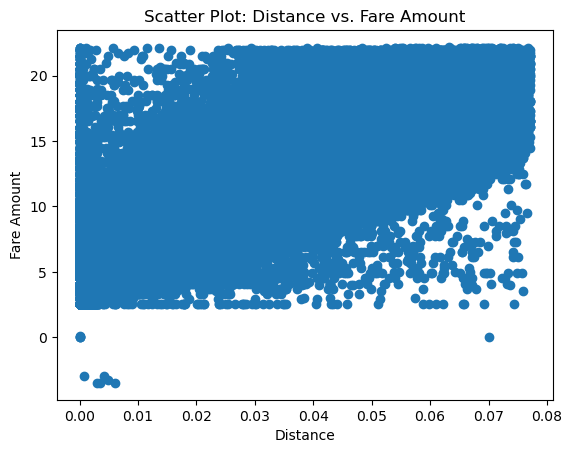

In [3]:
#Answer
# Create a scatter plot of distance vs. fare_amount
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: Distance vs. Fare Amount')
plt.show()


<h5>From the above plotting we can see that in normal case as our distance is increasing our fares also increase hand in hand.</h5>